# Importing required libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.preprocessing import MinMaxScaler as SCLR
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

### "stockUrl" returns a link to historical data of a stock from Yahoo Finance.

In [2]:
def stockUrl(stock, start, end):
  start = str(pd.to_datetime([start]).astype(int)[0]//10**9)
  end = str(pd.to_datetime([end]).astype(int)[0]//10**9)
  return "https://query1.finance.yahoo.com/v7/finance/download/" + stock + "?period1=" + start + "&period2=" + end + "&interval=1d&events=history"

# Obtaining historical data of Tesla from Yahoo Finance.

In [3]:
TSLA = pd.read_csv(stockUrl("TSLA", "2010-6-29", "2021-10-01"))
TSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2830,2021-09-24,745.890015,774.799988,744.559998,774.390015,774.390015,21373000
2831,2021-09-27,773.119995,799.000000,769.309998,791.359985,791.359985,28070700
2832,2021-09-28,787.200012,795.640015,766.179993,777.559998,777.559998,25381400
2833,2021-09-29,779.799988,793.500000,770.679993,781.309998,781.309998,20942900


# Analysis on the historical data of Tesla.

In [4]:
TSLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2835 non-null   object 
 1   Open       2835 non-null   float64
 2   High       2835 non-null   float64
 3   Low        2835 non-null   float64
 4   Close      2835 non-null   float64
 5   Adj Close  2835 non-null   float64
 6   Volume     2835 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.2+ KB


In [5]:
TSLA.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
sum(TSLA.duplicated())

0

In [7]:
x=[i for i in TSLA["Volume"]]
x=sorted(x)
mini=x[0]
maxi=x[len(x)-1]
print("Minimum volume recorded: ", mini)
print("Maximum volume recorded: ", maxi)

Minimum volume recorded:  592500
Maximum volume recorded:  304694000


In [8]:
max_high=max(TSLA["High"])
low_low=min(TSLA["Low"])
index_highest=TSLA["High"].idxmax()
index_lowest=TSLA["Low"].idxmin()
date_highest=TSLA["Date"][index_highest]
date_lowest=TSLA["Date"][index_lowest]
print("Highest stock was on:",date_highest,"and its price was",max_high)
print("Lowest stock was on:",date_lowest,"and its price was",low_low)

Highest stock was on: 2021-01-25 and its price was 900.400024
Lowest stock was on: 2010-07-07 and its price was 2.996


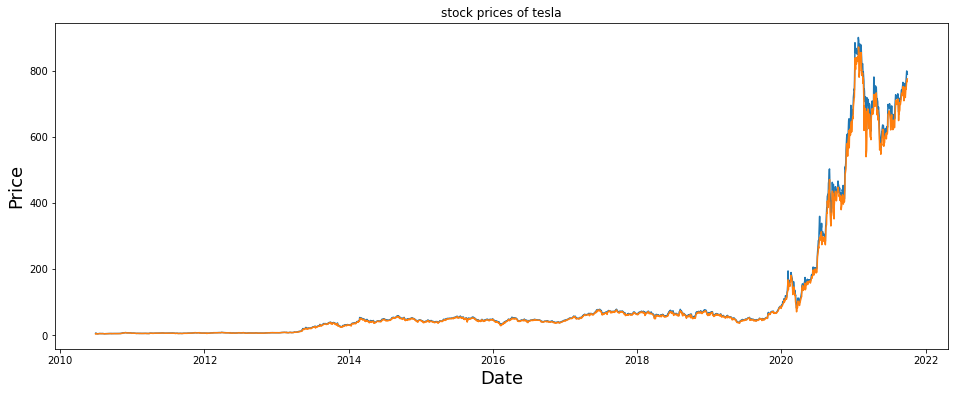

In [9]:
TSLA['Date'] = pd.to_datetime(TSLA['Date']).dt.date

dates=[i for i in TSLA['Date']]
plt.figure(figsize=(16,6))
plt.title('stock prices of tesla')
plt.plot(TSLA['Date'],TSLA["High"])
plt.plot(TSLA['Date'],TSLA["Low"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)

plt.show()

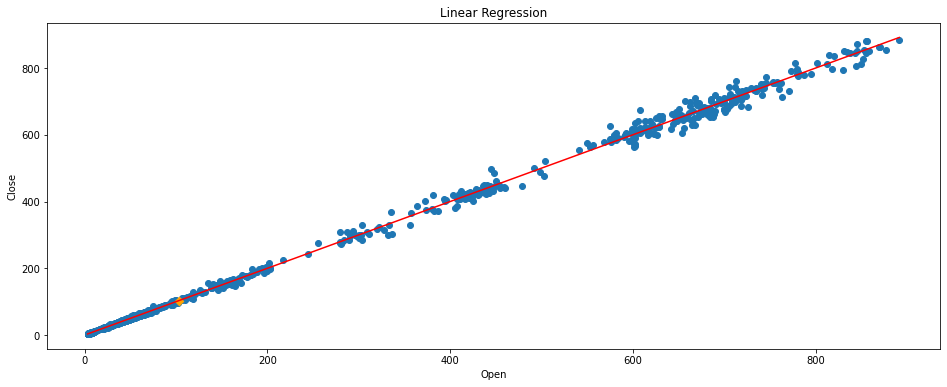

In [10]:
X = TSLA['Open'].values.reshape(-1, 1)  
Y = TSLA['Close'].values.reshape(-1, 1)   
a = sum([(x - np.mean(X)) * (y - np.mean(Y)) for x, y in zip(X,Y)]) / sum([(x - np.mean(X))**2 for x in X])
b = np.mean(Y) - a * np.mean(X)
yhat = lambda x: a * x + b
plt.figure(figsize=(16,6))
plt.scatter(X,Y)
plt.title('Linear Regression')
plt.xlabel('Open')
plt.ylabel('Close')
plt.plot([X.min(), X.max()], [yhat(X.min()), yhat(X.max())], color = 'red')
plt.scatter(X.mean(), Y.mean(), marker = 'D', c = 'orange');

# Obtaining historical data of NASDAQ Composite from Yahoo Finance.

In [11]:
IXIC = pd.read_csv(stockUrl("^IXIC", "2010-6-29", "2021-10-01"))
IXIC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,2183.919922,2185.300049,2122.669922,2135.179932,2135.179932,2827090000
1,2010-06-30,2134.030029,2153.360107,2105.260010,2109.239990,2109.239990,2221560000
2,2010-07-01,2110.750000,2117.939941,2061.139893,2101.360107,2101.360107,2717070000
3,2010-07-02,2105.500000,2110.659912,2077.709961,2091.790039,2091.790039,1672320000
4,2010-07-06,2122.280029,2136.300049,2077.770020,2093.879883,2093.879883,2173030000
...,...,...,...,...,...,...,...
2830,2021-09-24,14961.610352,15067.559570,14946.570313,15047.700195,15047.700195,3972140000
2831,2021-09-27,14954.179688,15003.160156,14864.959961,14969.969727,14969.969727,4619450000
2832,2021-09-28,14787.209961,14817.740234,14539.879883,14546.679688,14546.679688,4954270000
2833,2021-09-29,14614.879883,14676.620117,14493.669922,14512.440430,14512.440430,5246170000


# Analysis on the historical data of NASDAQ Composite.

In [12]:
IXIC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2835 entries, 0 to 2834
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2835 non-null   object 
 1   Open       2835 non-null   float64
 2   High       2835 non-null   float64
 3   Low        2835 non-null   float64
 4   Close      2835 non-null   float64
 5   Adj Close  2835 non-null   float64
 6   Volume     2835 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 155.2+ KB


In [13]:
IXIC.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [14]:
sum(IXIC.duplicated())

0

In [15]:
x=[i for i in IXIC["Volume"]]
x=sorted(x)
mini=x[0]
maxi=x[len(x)-1]
print("Minimum volume recorded: ", mini)
print("Maximum volume recorded: ", maxi)

Minimum volume recorded:  149410000
Maximum volume recorded:  11102160000


In [16]:
max_high=max(IXIC["High"])
low_low=min(IXIC["Low"])
index_highest=IXIC["High"].idxmax()
index_lowest=IXIC["Low"].idxmin()
date_highest=IXIC["Date"][index_highest]
date_lowest=IXIC["Date"][index_lowest]
print("Highest stock was on:",date_highest,"and its price was",max_high)
print("Lowest stock was on:",date_lowest,"and its price was",low_low)

Highest stock was on: 2021-09-07 and its price was 15403.44043
Lowest stock was on: 2010-07-01 and its price was 2061.139893


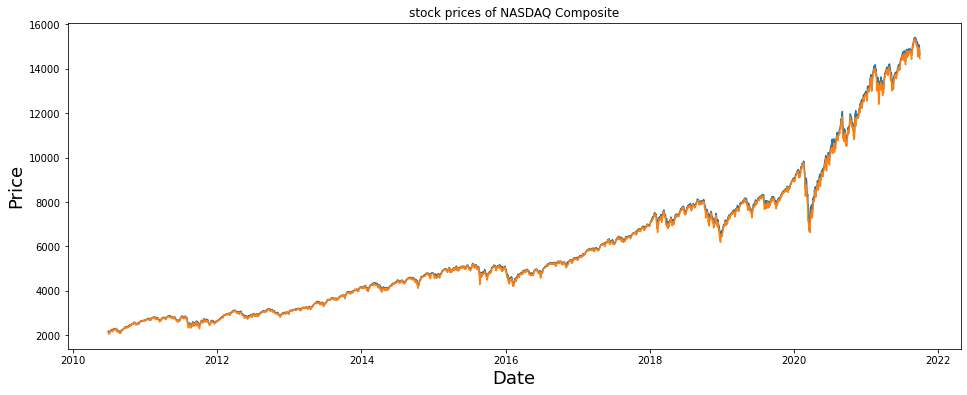

In [17]:
IXIC['Date'] = pd.to_datetime(IXIC['Date']).dt.date

dates=[i for i in IXIC['Date']]
plt.figure(figsize=(16,6))
plt.title('stock prices of NASDAQ Composite')
plt.plot(IXIC['Date'],IXIC["High"])
plt.plot(IXIC['Date'],IXIC["Low"])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price', fontsize=18)

plt.show()

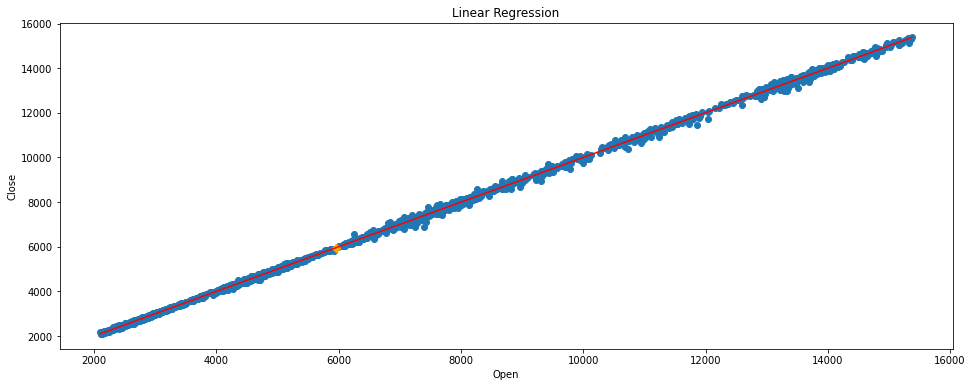

In [18]:
X = IXIC['Open'].values.reshape(-1, 1)  
Y = IXIC['Close'].values.reshape(-1, 1)   
a = sum([(x - np.mean(X)) * (y - np.mean(Y)) for x, y in zip(X,Y)]) / sum([(x - np.mean(X))**2 for x in X])
b = np.mean(Y) - a * np.mean(X)
yhat = lambda x: a * x + b
plt.figure(figsize=(16,6))
plt.scatter(X,Y)
plt.title('Linear Regression')
plt.xlabel('Open')
plt.ylabel('Close')
plt.plot([X.min(), X.max()], [yhat(X.min()), yhat(X.max())], color = 'red')
plt.scatter(X.mean(), Y.mean(), marker = 'D', c = 'orange');

# Prediction Tesla

### Scaling Data

In [19]:
sclr = SCLR(feature_range = (0, 1))
scaledData = sclr.fit_transform(TSLA["Close"].values.reshape(-1, 1))
numberOfDays = 60
x = []
y = []

for i in range(numberOfDays, len(scaledData)):
  x.append(scaledData[i - numberOfDays : i, 0])
  y.append(scaledData[i, 0])

x = np.array(x)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
y = np.array(y)

### Building Model

In [20]:
mdl = Sequential()

mdl.add(LSTM(units = 50, return_sequences = True, input_shape = (x.shape[1], 1)))
mdl.add(Dropout(0.2))

mdl.add(LSTM(units = 50, return_sequences = True))
mdl.add(Dropout(0.2))

mdl.add(LSTM(units = 50))
mdl.add(Dropout(0.2))

mdl.add(Dense(units = 1))

mdl.compile(optimizer = "adam", loss = "mean_squared_error")
mdl.fit(x, y, epochs = 25, batch_size = 50)

Epoch 1/25
56/56 [==============================] - 11s 97ms/step - loss: 0.0041
Epoch 2/25
56/56 [==============================] - 5s 97ms/step - loss: 0.0018
Epoch 3/25
56/56 [==============================] - 5s 95ms/step - loss: 0.0012
Epoch 4/25
56/56 [==============================] - 5s 94ms/step - loss: 0.0011
Epoch 5/25
56/56 [==============================] - 5s 95ms/step - loss: 0.0013
Epoch 6/25
56/56 [==============================] - 5s 96ms/step - loss: 0.0010
Epoch 7/25
56/56 [==============================] - 5s 95ms/step - loss: 0.0011
Epoch 8/25
56/56 [==============================] - 5s 96ms/step - loss: 8.4192e-04
Epoch 9/25
56/56 [==============================] - 5s 96ms/step - loss: 9.2580e-04
Epoch 10/25
56/56 [==============================] - 5s 95ms/step - loss: 9.2670e-04
Epoch 11/25
56/56 [==============================] - 5s 95ms/step - loss: 8.3250e-04
Epoch 12/25
56/56 [==============================] - 5s 95ms/step - loss: 8.5709e-04
Epoch 13/25
56/5

### Tesing Model

In [21]:
newTSLA = pd.read_csv(stockUrl("TSLA", "2021-10-01", "2022-02-01"))
newTSLA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-01,778.400024,780.780029,763.590027,775.219971,775.219971,17031400
1,2021-10-04,796.500000,806.969971,776.119995,781.530029,781.530029,30483300
2,2021-10-05,784.799988,797.309998,774.200012,780.590027,780.590027,18432600
3,2021-10-06,776.200012,786.659973,773.219971,782.750000,782.750000,14632800
4,2021-10-07,785.460022,805.000000,783.380005,793.609985,793.609985,19195800
...,...,...,...,...,...,...,...
65,2022-01-04,1189.550049,1208.000000,1123.050049,1149.589966,1149.589966,33416100
66,2022-01-05,1146.650024,1170.339966,1081.010010,1088.119995,1088.119995,26706600
67,2022-01-06,1077.000000,1088.000000,1020.500000,1064.699951,1064.699951,30112200
68,2022-01-07,1080.369995,1080.930054,1010.000000,1026.959961,1026.959961,27919000


In [22]:
trueClose = newTSLA["Close"].values

totalClose = pd.concat((TSLA["Close"], newTSLA["Close"]), axis = 0)

mdlInputs = totalClose[len(totalClose) - len(newTSLA) - numberOfDays :].values.reshape(-1, 1)
mdlInputs = sclr.transform(mdlInputs)

In [23]:
xTst = []

for i in range(numberOfDays, len(mdlInputs)):
  xTst.append(mdlInputs[i - numberOfDays : i, 0])

xTst = np.array(xTst)
xTst = np.reshape(xTst, (xTst.shape[0], xTst.shape[1], 1))

prdctdClose = sclr.inverse_transform(mdl.predict(xTst))

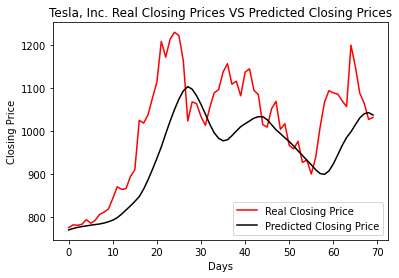

In [24]:
plt.plot(trueClose, color = "red", label = "Real Closing Price")
plt.plot(prdctdClose, color = "black", label = "Predicted Closing Price")
plt.title("Tesla, Inc. Real Closing Prices VS Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

### Predicting the Closing Value on 11/1/2022

In [25]:
feed = [mdlInputs[len(mdlInputs) - numberOfDays : len(1 + mdlInputs), 0]]
feed = np.array(feed)
feed = np.reshape(feed, (feed.shape[0], feed.shape[1], 1))

prediction = mdl.predict(feed)
prediction = sclr.inverse_transform(prediction)
print(prediction)

[[1026.6567]]


# Prediction NASDAQ Composite

### Scaling Data

In [26]:
sclr = SCLR(feature_range = (0, 1))
scaledData = sclr.fit_transform(IXIC["Close"].values.reshape(-1, 1))
numberOfDays = 60
x = []
y = []

for i in range(numberOfDays, len(scaledData)):
  x.append(scaledData[i - numberOfDays : i, 0])
  y.append(scaledData[i, 0])

x = np.array(x)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))
y = np.array(y)

### Building Model

In [27]:
mdl = Sequential()

mdl.add(LSTM(units = 50, return_sequences = True, input_shape = (x.shape[1], 1)))
mdl.add(Dropout(0.2))

mdl.add(LSTM(units = 50, return_sequences = True))
mdl.add(Dropout(0.2))

mdl.add(LSTM(units = 50))
mdl.add(Dropout(0.2))

mdl.add(Dense(units = 1))

mdl.compile(optimizer = "adam", loss = "mean_squared_error")
mdl.fit(x, y, epochs = 25, batch_size = 50)

Epoch 1/25
56/56 [==============================] - 11s 98ms/step - loss: 0.0126
Epoch 2/25
56/56 [==============================] - 6s 98ms/step - loss: 0.0020
Epoch 3/25
56/56 [==============================] - 5s 97ms/step - loss: 0.0017
Epoch 4/25
56/56 [==============================] - 5s 98ms/step - loss: 0.0014
Epoch 5/25
56/56 [==============================] - 5s 96ms/step - loss: 0.0016
Epoch 6/25
56/56 [==============================] - 5s 96ms/step - loss: 0.0015
Epoch 7/25
56/56 [==============================] - 5s 96ms/step - loss: 0.0015
Epoch 8/25
56/56 [==============================] - 5s 97ms/step - loss: 0.0013
Epoch 9/25
56/56 [==============================] - 5s 97ms/step - loss: 0.0012
Epoch 10/25
56/56 [==============================] - 5s 96ms/step - loss: 0.0012
Epoch 11/25
56/56 [==============================] - 5s 96ms/step - loss: 0.0013
Epoch 12/25
56/56 [==============================] - 5s 97ms/step - loss: 0.0012
Epoch 13/25
56/56 [=================

### Testing Model

In [28]:
newIXIC = pd.read_csv(stockUrl("^IXIC", "2021-10-01", "2022-02-01"))
newIXIC

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-01,14494.929688,14606.820313,14324.009766,14566.700195,14566.700195,4688550000
1,2021-10-04,14493.120117,14499.740234,14181.690430,14255.480469,14255.480469,4539650000
2,2021-10-05,14312.860352,14508.650391,14299.780273,14433.830078,14433.830078,4143190000
3,2021-10-06,14289.450195,14509.549805,14259.070313,14501.910156,14501.910156,4443760000
4,2021-10-07,14631.799805,14755.719727,14615.139648,14654.019531,14654.019531,3936210000
...,...,...,...,...,...,...,...
65,2022-01-04,15852.139648,15852.139648,15512.410156,15622.719727,15622.719727,5109270000
66,2022-01-05,15547.160156,15586.299805,15095.179688,15100.169922,15100.169922,5011990000
67,2022-01-06,15024.150391,15198.450195,14914.870117,15080.860352,15080.860352,4774740000
68,2022-01-07,15095.719727,15171.019531,14877.629883,14935.900391,14935.900391,4229270000


In [29]:
trueClose = newIXIC["Close"].values

totalClose = pd.concat((IXIC["Close"], newIXIC["Close"]), axis = 0)

mdlInputs = totalClose[len(totalClose) - len(newIXIC) - numberOfDays :].values.reshape(-1, 1)
mdlInputs = sclr.transform(mdlInputs)

In [30]:
xTst = []

for i in range(numberOfDays, len(mdlInputs)):
  xTst.append(mdlInputs[i - numberOfDays : i, 0])

xTst = np.array(xTst)
xTst = np.reshape(xTst, (xTst.shape[0], xTst.shape[1], 1))

prdctdClose = sclr.inverse_transform(mdl.predict(xTst))

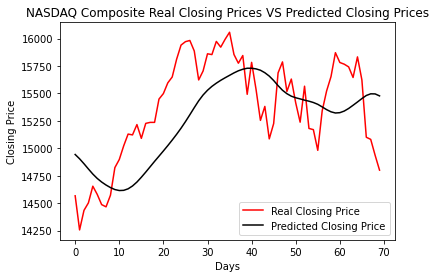

In [31]:
plt.plot(trueClose, color = "red", label = "Real Closing Price")
plt.plot(prdctdClose, color = "black", label = "Predicted Closing Price")
plt.title("NASDAQ Composite Real Closing Prices VS Predicted Closing Prices")
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.legend()
plt.show()

### Predicting the Closing Value on 11/1/2022

In [32]:
feed = [mdlInputs[len(mdlInputs) - numberOfDays : len(1 + mdlInputs), 0]]
feed = np.array(feed)
feed = np.reshape(feed, (feed.shape[0], feed.shape[1], 1))

prediction = mdl.predict(feed)
prediction = sclr.inverse_transform(prediction)
print(prediction)

[[15442.1455]]
